In [184]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

path = ('./')

# 1. K-Means and Mean-Shift Clustering for Segmentation

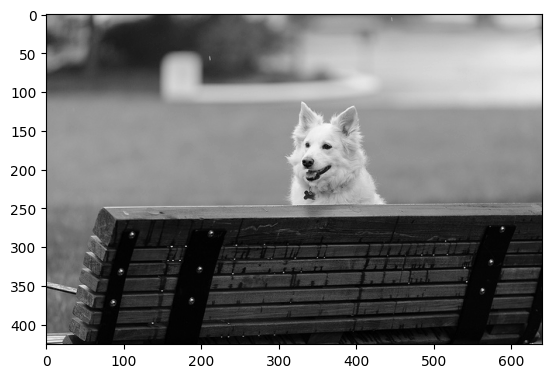

In [185]:
dog = cv2.imread(path+'part1/Dog.jpg')
person = cv2.imread(path+'part1/Person.jpg')

dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
person = cv2.cvtColor(person, cv2.COLOR_BGR2GRAY)

plt.imshow(dog, cmap="gray")

## 1

In [186]:
# Define filter1
top_half = np.ones((3, 12))
bottom_half = np.negative(np.ones((3, 12)))
filter1 = np.vstack((top_half, bottom_half))

# Define filter2
left_half = np.vstack((np.ones((6, 6)), np.negative(np.ones((6, 6)))))
right_half = np.vstack((np.negative(np.ones((6, 6))), np.ones((6, 6))))
filter2 = np.hstack((left_half, right_half))

# integral_dog = np.cumsum(np.cumsum(dog, axis=0), axis=1)
# integral_person = np.cumsum(np.cumsum(person, axis=0), axis=1)

def apply_filter1(integral_image, threshold=0):

    height, width = integral_image.shape
    k_height, k_width = 6, 12
    output = np.zeros((height, width))

    for y in range(height):
      for x in range(width):

        y3 = y +3
        y6 = y + 6
        xw = x + k_width

        if y3 > height-1:
          y3 = height-1
        if xw > width-1:
          xw = width-1
        if y6 > height-1:
          y6 = height-1

        positive_region = (integral_image[y,x] +
                      integral_image[y3, xw] -
                      integral_image[y3, x] -
                      integral_image[y, xw])

        negative_sum = (integral_image[y3,x] +
                      integral_image[y3, xw] -
                      integral_image[y6, x] -
                      integral_image[y6, xw])

        region_sum = positive_region - negative_sum
        if region_sum > threshold:
          output[y,x] = region_sum
        else:
          output[y,x] = 0
        

    return output

def apply_filter2(integral_image, threshold=0):

    height, width = integral_image.shape
    k_height, k_width = 12, 12
    output = np.zeros((height, width))

    for y in range(height):
      for x in range(width):

        y6 = y + 6
        y12 = y + 12
        x6 = x + 6
        x12 = x + 12

        if y6 > height-1:
          y6 = height-1
        if x6 > width-1:
          x6 = width-1
        if y12 > height-1:
          y12 = height-1
        if x12 > width-1:
          x12 = width-1

        negative_sum1 = (integral_image[y,x] +
                    integral_image[y, x6] -
                    integral_image[y6, x] -
                    integral_image[y6, x6])

        positive_region1 = (integral_image[y,x6] +
                      integral_image[y, x12] -
                      integral_image[y6, x6] -
                      integral_image[y6, x12])

        negative_sum2 = (integral_image[y6,x6] +
                      integral_image[y6, x12] -
                      integral_image[y12, x6] -
                      integral_image[y12, x12])

        positive_region2 = (integral_image[y6,x] +
                      integral_image[y6, x6] -
                      integral_image[y12, x] -
                      integral_image[y12, x6])

        region_sum = positive_region1 + positive_region2 - negative_sum1 - negative_sum2
        if region_sum > threshold:
          output[y,x] = region_sum
        else:
          output[y,x] = 0

    return output


# filter1Dog = apply_filter1(dog, threshold=200)
# filter2Dog = apply_filter2(dog, threshold=200)
# filter1Person = apply_filter1(person)
# filter2Person = apply_filter2(person)

# filter1Dog = apply_haar_filter(integral_dog, filter1)
# filter2Dog = apply_haar_filter(integral_dog, filter2)
# filter1Person = apply_haar_filter(integral_person, filter1)
# filter2Person = apply_haar_filter(integral_person, filter2)

filter1Dog = cv2.filter2D(dog, -1, filter1)
filter2Dog = cv2.filter2D(dog, -1, filter2)
filter1Person = cv2.filter2D(person, -1, filter1)
filter2Person = cv2.filter2D(person, -1, filter2)

# filteredDog = np.stack((filter1Dog, filter2Dog), axis=2)
# filteredPerson = np.stack((filter1Person, filter2Person), axis=2)

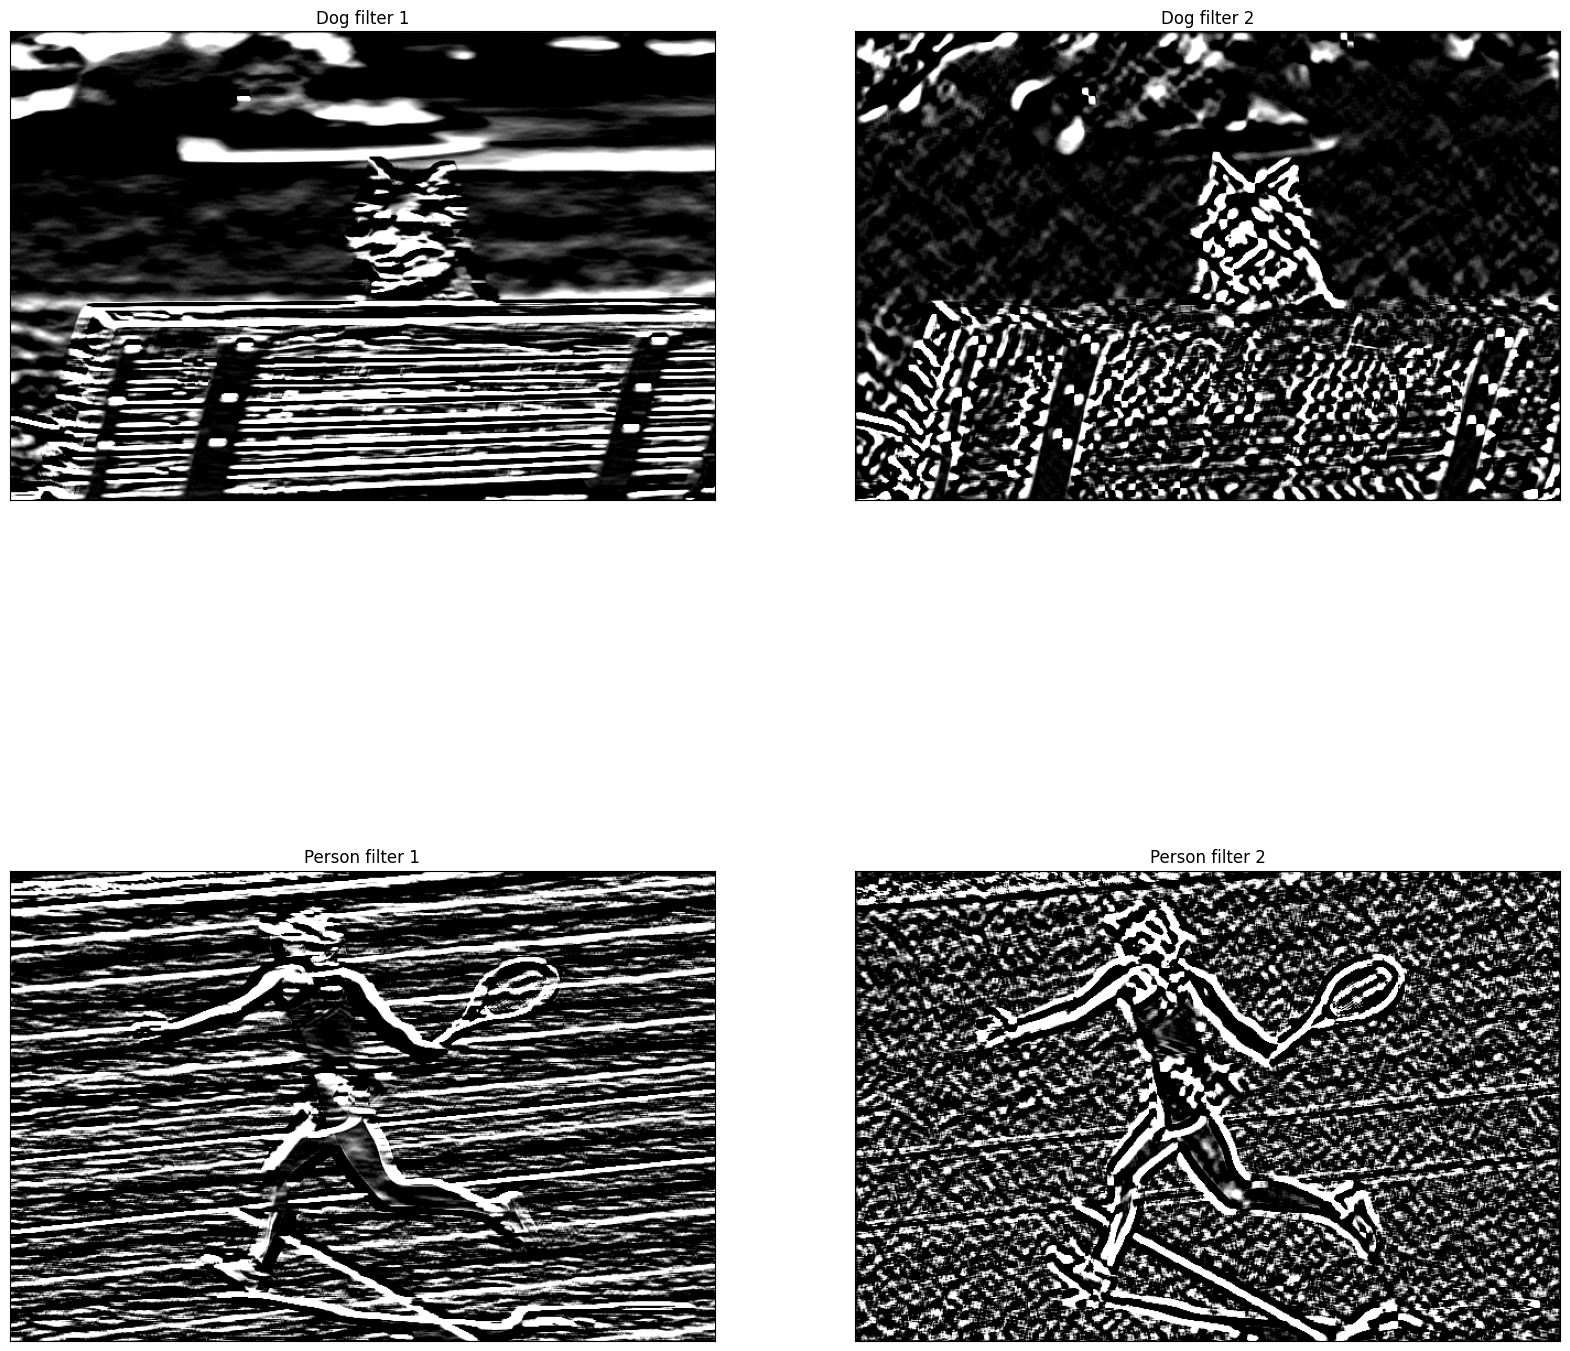

In [187]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(filter1Dog, cmap='gray')
plt.title("Dog filter 1"), plt.xticks([]), plt.yticks([])
plt.subplot(222)
plt.imshow(filter2Dog, cmap='gray')
plt.title("Dog filter 2"), plt.xticks([]), plt.yticks([])
plt.subplot(223)
plt.imshow(filter1Person, cmap='gray')
plt.title("Person filter 1"), plt.xticks([]), plt.yticks([])
plt.subplot(224)
plt.imshow(filter2Person, cmap='gray')
plt.title("Person filter 2"), plt.xticks([]), plt.yticks([])
plt.show()

## 2 K-means clustering

147716000.50825775 171856007.7522505


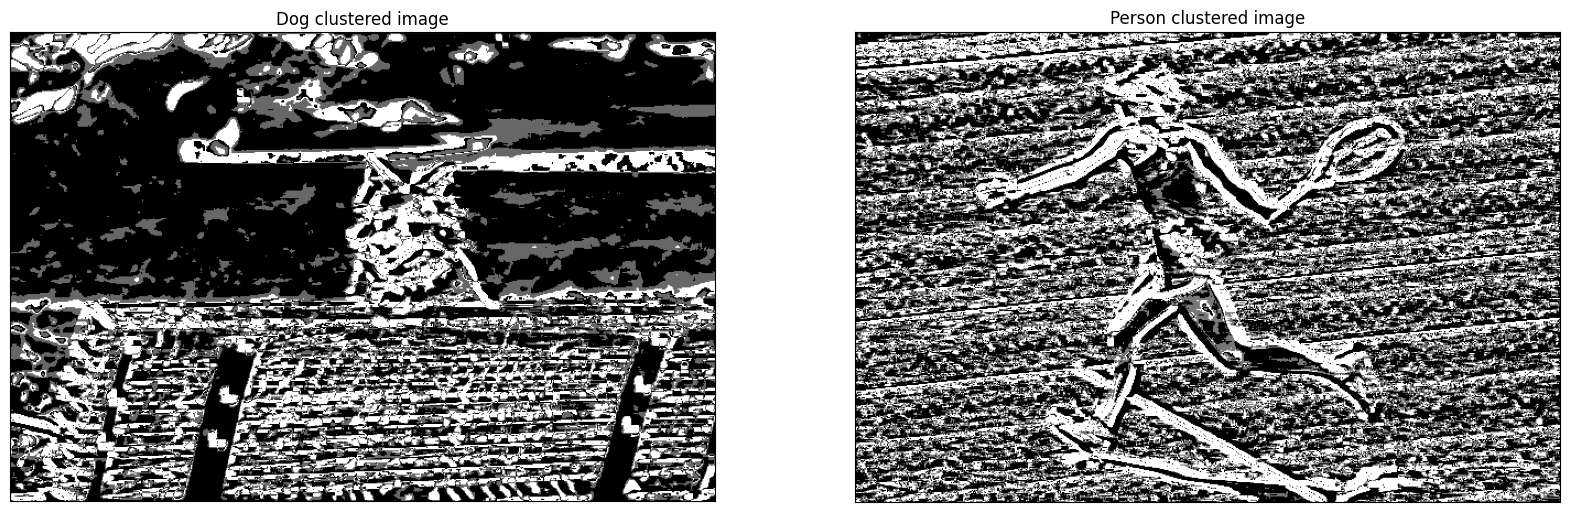

In [188]:
filteredDog = filter1Dog + filter2Dog
filteredPerson = filter1Person + filter2Person

## convert images to np.float32
dog32 = np.float32(filteredDog)
person32 = np.float32(filteredPerson)

# apply K-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
compactnessDog, labelsDog, (centersDog) = cv2.kmeans(dog32.flatten(), K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
compactnessPerson, labelsPerson, (centersPerson) = cv2.kmeans(person32.flatten(), K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

print(compactnessDog, compactnessPerson)

# convert back to uint8
centersDog = np.uint8(centersDog)
out = centersDog[labelsDog.flatten()]
dog = out.reshape((dog.shape))

centersPerson = np.uint8(centersPerson)
out = centersPerson[labelsPerson.flatten()]
person = out.reshape((person.shape))

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(dog, cmap='gray')
plt.title("Dog clustered image"), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(person, cmap='gray')
plt.title("Person clustered image"), plt.xticks([]), plt.yticks([])
plt.show()

## 3 MeanShift

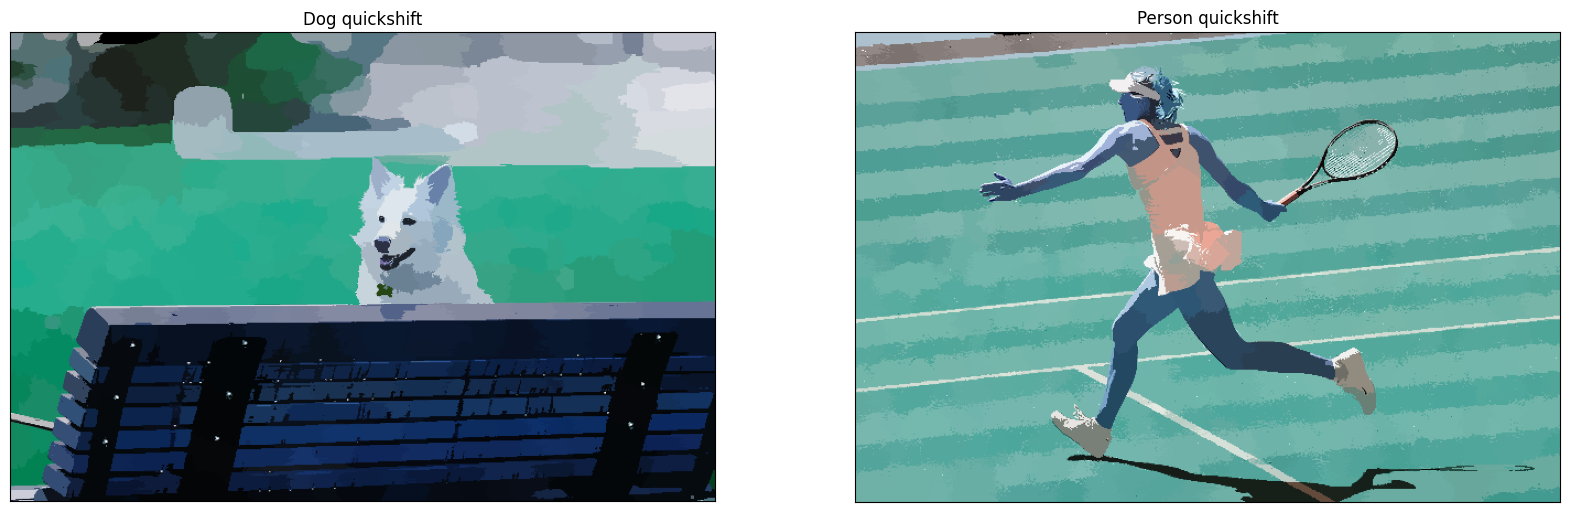

In [189]:
from skimage.segmentation import quickshift
from skimage import color

dog_img = cv2.imread(path+'part1/Dog.jpg')
person_img = cv2.imread(path+'part1/Person.jpg')

dog = cv2.cvtColor(dog_img, cv2.COLOR_BGR2RGB)
person = cv2.cvtColor(person_img, cv2.COLOR_BGR2RGB)

dog = quickshift(dog)
dogout = color.label2rgb(dog, dog_img, kind='avg')
person = quickshift(person)
personout = color.label2rgb(person, person_img, kind='avg')

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(dogout)
plt.title("Dog quickshift"), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(personout)
plt.title("Person quickshift"), plt.xticks([]), plt.yticks([])
plt.show()

## 4. Discuss

K-means: K-means has many applications, and is useful since it has good efficiency and is simple to implement. It does present some limitations, including the fact that the number of cluster needs to be determined in advance, and that it is not very good in dealing in complex shape (other than round shapes). As can be seen from the result in this notebook, k-means clustering struggles to deal with outliers.

Mean Shift: Unlike K-means, mean shift does not require set parameters to be decided in advance, which can be a desirable feature for an image segmentation method. Furthermore, Mean shift can handle non-linear clustering, and is more robust towards outliers than K-means is. However, mean shift is significantly more computationally intensive, and lacks in scalability. 

# 2. Neural Network Implementation for Image Segmentation

In [190]:
tennis_img = cv2.imread(path+'part2/552.jpg')
car_img = cv2.imread(path+'part2/7226.jpg')

## Mask R-CNN

In [191]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

Processing /home/emile/.cache/pip/wheels/52/dd/2b/10ff8b0ac81b93946bb5fb9e6749bae2dac246506c8774e6cf/PyYAML-5.1-cp38-cp38-linux_x86_64.whl
ERROR: ultralytics 8.1.34 has requirement pyyaml>=5.3.1, but you'll have pyyaml 5.1 which is incompatible.
ERROR: jupyter-events 0.9.0 has requirement pyyaml>=5.3, but you'll have pyyaml 5.1 which is incompatible.
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0.1
    Uninstalling PyYAML-6.0.1:
      Successfully uninstalled PyYAML-6.0.1
fatal: destination path 'detectron2' already exists and is not an empty directory.


In [192]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [193]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs_tennis = predictor(tennis_img)
outputs_car = predictor(car_img)

[03/27 11:29:55 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


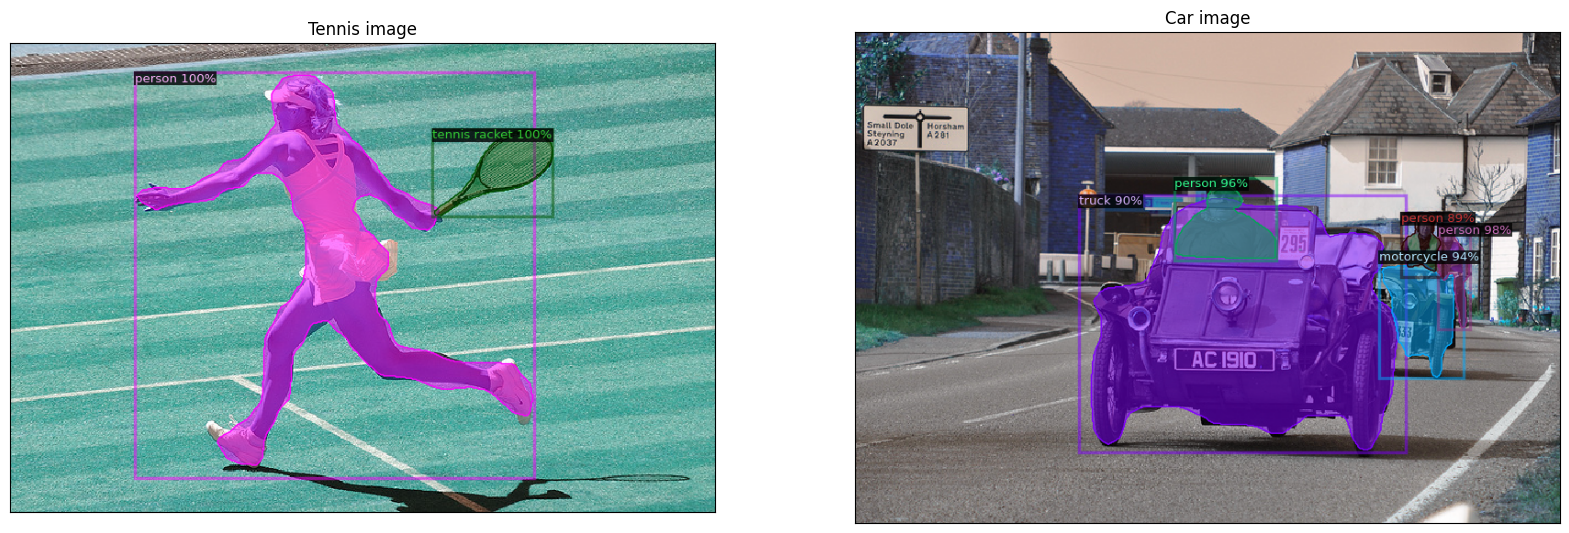

In [194]:
v_tennis = Visualizer(tennis_img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out_tennis = v_tennis.draw_instance_predictions(outputs_tennis["instances"].to("cpu"))

v_car = Visualizer(car_img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out_car = v_car.draw_instance_predictions(outputs_car["instances"].to("cpu"))
# cv2_imshow(out.get_image()[:, :, ::-1])
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(out_tennis.get_image()[:, :, ::-1])
plt.title("Tennis image"), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(out_car.get_image()[:, :, ::-1])
plt.title("Car image"), plt.xticks([]), plt.yticks([])
plt.show()

## YOLOv8


0: 448x640 1 person, 1 tennis racket, 5.1ms
Speed: 3.6ms preprocess, 5.1ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 4 persons, 1 truck, 5.0ms
Speed: 0.9ms preprocess, 5.0ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


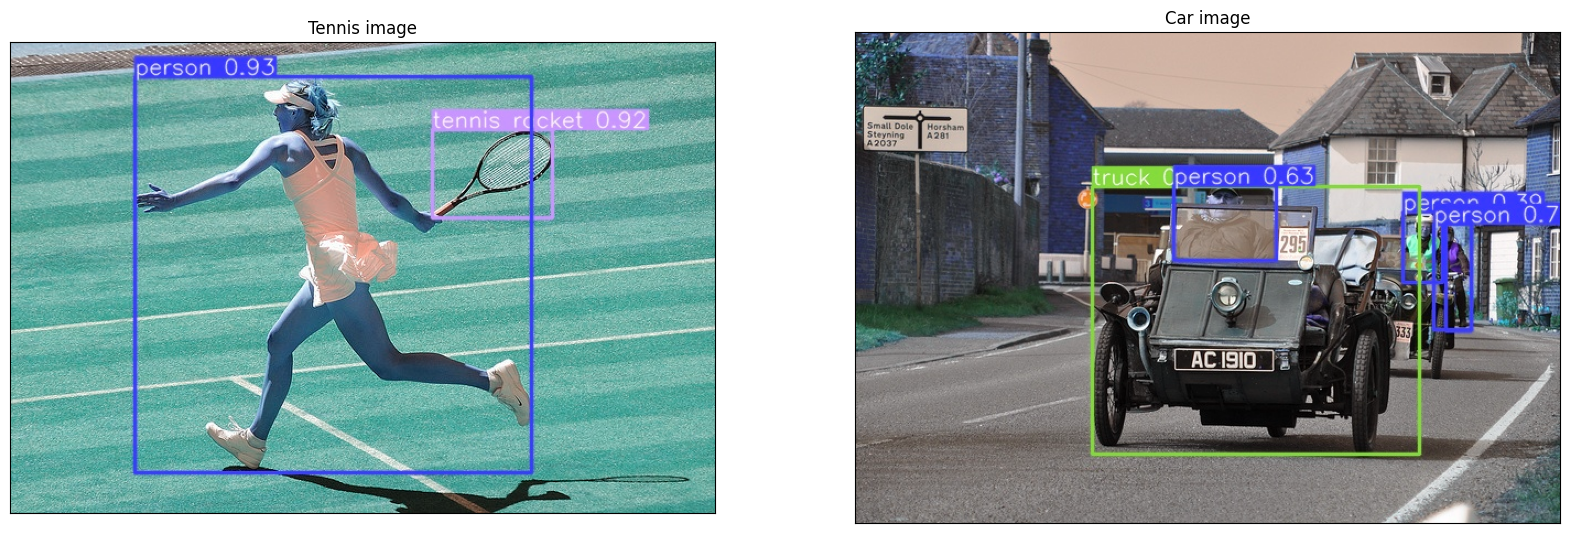

In [195]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model(tennis_img)  # predict on an image
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.save(filename='./tennis_result.jpg')  # save to disk


results = model(car_img)  # predict on an image
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.save(filename='./car_result.jpg')  # save to disk

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(cv2.imread('./tennis_result.jpg'))
plt.title("Tennis image"), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(cv2.imread('./car_result.jpg'))
plt.title("Car image"), plt.xticks([]), plt.yticks([])
plt.show()

## Montreal image

In [196]:
mtl_img = cv2.imread(path+'part2/montreal_street.jpg')

In [197]:
output_mtl = predictor(mtl_img)
results = model(mtl_img)

for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.save(filename='./mtl_result.jpg')  # save to disk


0: 480x640 5 cars, 1 motorcycle, 5.3ms
Speed: 2.3ms preprocess, 5.3ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


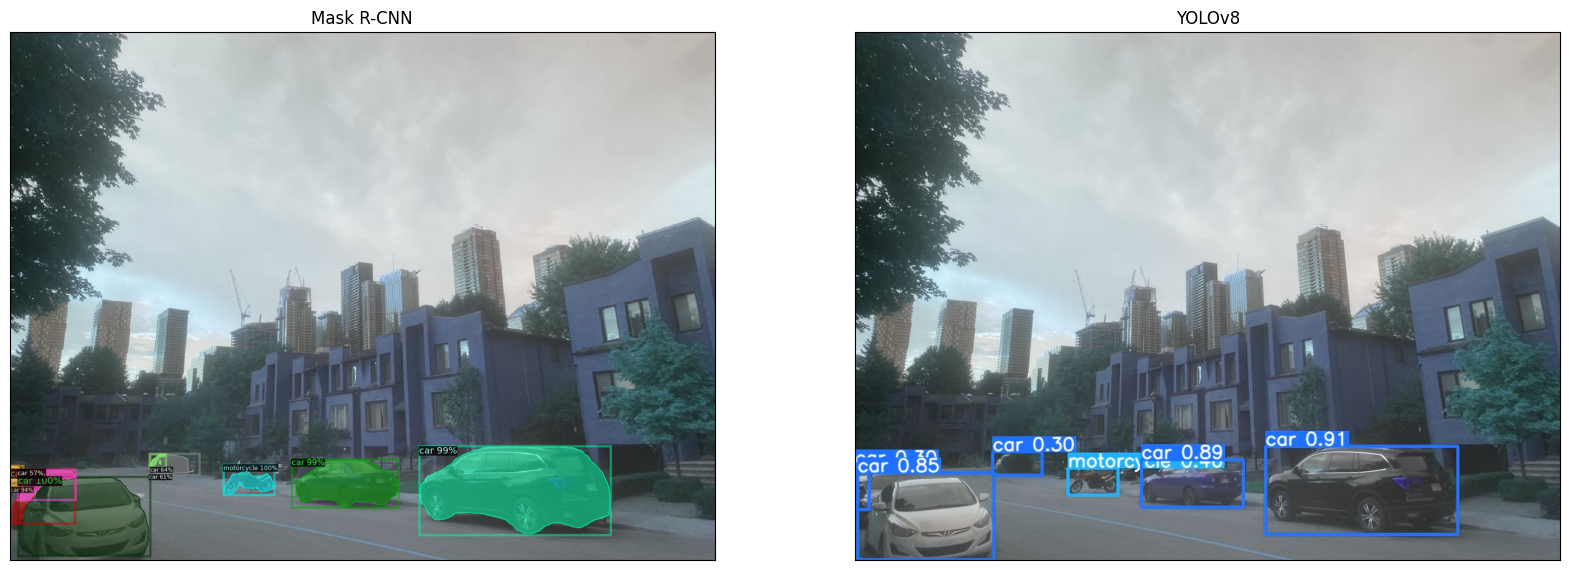

In [198]:
v_mtl = Visualizer(mtl_img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out_mtl = v_mtl.draw_instance_predictions(output_mtl["instances"].to("cpu"))

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(out_mtl.get_image()[:, :, ::-1])
plt.title("Mask R-CNN"), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(cv2.imread('./mtl_result.jpg'))
plt.title("YOLOv8"), plt.xticks([]), plt.yticks([])
plt.show()

## 4.Discuss
Both models perform similarly in detecting the different objects in the picture. However, Mask R-CNN does seem to do so with higher confidence, meaning the probability for each objects is higher. It also detects more objects that are hard to discern. 

Here are the steps of the Mask R-CNN model:

- 1: Anchor sorting and filtering

    The model generates anchors in the image, to give a set of proposed bounding boxes

- 2: Bounding boxes refinement

    The model refines the bounding boxes obtained from step one, and filters out invalid ones

- 3: Mask generation

    The model generates mask for the shapes it is detecting

- 4: Output

    The model outputs prediction based on the masks it generated and its pre-trained weights. This will output the final result with bounding boxes associated to their corresponding labels

